# Tutorial for modelling the Interferometric Point Spread Function (iPSF) of a nanoparticle imaged via wide-field iSCAT microscopy
iPSF is a vectorial diffraction model using which we can describe the image formation of a point source imaged via wide-field iSCAT microscope [[1](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-28-18-25969&id=434558)].
 In this tutorial, we want to use the [iPSF model](), to calculate wide-field iSCAT images of a nano scatterer in two different scenarios.
 Initially we consider a particle being fixed at its 3D position in the sample, while we calculate several defocused images of it.
 We then use the model to compute iPSF images of a nanoparticle that is travelling in the axial direction while the focus is kept fixed.
 The ability of iPSF formulation to model the image of a nanoparticle in 3D with the focus also being at an arbitrary position opens the door to perform long-range particle tracking experiments via wide-field iSCAT.

### Setting up the PiSCAT modules

In [1]:
# Only to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting up the path to the PiSCAT modules
import os
import sys
current_path = os.path.abspath(os.path.join('..'))
dir_path = os.path.dirname(current_path)
module_path = os.path.join(dir_path)
if module_path not in sys.path:
    sys.path.append(module_path)


### Imaging setup parameters
Here we create an object from the class called [ImagingSetupParameters]() and enter the neccessary values for iPSF modelling into it.

In [2]:
from piscat.iPSF_model import ImagingSetupParameters
p = ImagingSetupParameters

# Wavelength of the light source in meters
p.wavelength = 540e-9
# Numerical Aperture (NA) of the objective lens
p.NA = 1.4
# Thickness of the immersion oil, nominal value in meters
p.ti0 = 180e-6
# Refractive index of the immersion oil, nominal value
p.ni0 = 1.5
# Refractive index of the immersion oil, experimental value
p.ni = 1.5
# Thickness of the coverglass, nominal value in meters
p.tg0 = 170e-6
# Thickness of the coverglass, experimental value in meters
p.tg = 170e-6
# Refractive index of the coverglass, nominal value
p.ng0 = 1.5
# Refractive index of the coverglass, experimental value
p.ng = 1.5
# Refractive index of the sample/medium
p.ns = 1.33
# Physical size of the camera pixel in meters
p.pixel_size_physical = 5.8e-6
# Imaging pixel size in meters, related to the physical pixel size through the magnification of the setup
pixel_size = 38e-9
# Magnification of the imaging system
p.M = p.pixel_size_physical / pixel_size

import math
p.k0 = 2 * math.pi / p.wavelength   #Wavevector
p.alpha = math.asin(p.NA / p.ni)    #Largest angle collected by our Objective lens

### Scenario I: Modelling defocused iPSF images of a nanoparticle imaged via wide-field iSCAT microscopy
Here we position a particle at the height of 3 𝜇m above the coverslip and sweep the focal plane starting from the coverslip (𝑧focus=0 𝜇m) up to 7 𝜇m above the particle (𝑧focus=10 𝜇m).

In [3]:
import numpy as np
# The range across which the focus is swept
z_focus_array = np.arange(0, 10, 1e-1) * 1e-6
# The 3D position of the nanoparticle
Xp = [0, 0, 3e-6]
# Number of lateral pixels over which the image is calculated
nx = 513
# Number of lateral pixels over which the calculated image is cropped
r_ = 50
nz = np.size(z_focus_array)

Here we import the iPSF module and calculate the scattered field on the detector for different focus positions

In [4]:
from piscat.iPSF_model.ScatteredFieldDifferentialPhase import ScatteredFieldDifferentialPhase
scattered_field = ScatteredFieldDifferentialPhase(p, Xp, z_focus_array, nz, nx)
scatteredFieldAmplitude_focalStack, scatteredFieldPhase_focalStack = scattered_field.calculate(r_)
iPSFs_focalStack = np.multiply(scatteredFieldAmplitude_focalStack, np.cos(scatteredFieldPhase_focalStack))
iPSFs_focalStack = iPSFs_focalStack / np.max(np.abs(iPSFs_focalStack[...]))

As mentioned earlier, the [Visualization module](https://max-planck-institute-for-the-science-of-light-piscat.readthedocs-hosted.com/en/latest/code_reference.html#piscat-visualization) consists of several classes which provide display functionalities.
We now use the jupyter display function in PiSCAT to visualize modelled iPSFs of a particle (positioned at z=3 𝜇m) and imaged with focus being swept from 0 𝜇m to 10 𝜇m with the steps of 100 nm.

In [5]:
%matplotlib inline
from piscat.Visualization.display_jupyter import JupyterDisplay
list_titles = z_focus_array.tolist()
list_titles = ["defocusing positions=" + str(z_*1e6) + ' um' for z_ in list_titles]

JupyterDisplay(video=iPSFs_focalStack, title=list_titles, imgSizex=5, imgSizey=5, 
               xlabel='x-axis (x' + str(pixel_size*1e9) + ' nm)', ylabel='y-axis (x' + str(pixel_size*1e9) + ' nm)')

interactive(children=(IntSlider(value=10, continuous_update=False, description='Frame:', layout=Layout(width='…

#### Visualization of the iPSF, scattered amplitude phase of the meridonal plane in the focal stack

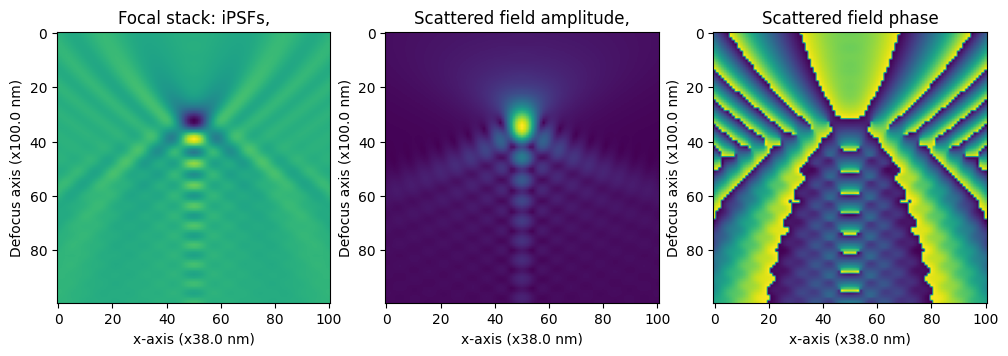

In [6]:
iPSFs_focalStack_meirdonal = iPSFs_focalStack[:,1+r_,:]
scatteredFieldAmplitude_focalStack_meirdonal = scatteredFieldAmplitude_focalStack[:,1+r_,:]
scatteredFieldPhase_focalStack_meirdonal = scatteredFieldPhase_focalStack[:,1+r_,:]

import matplotlib.pylab as plt
%matplotlib inline
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax_1 = fig.add_subplot(131)
ax_1.imshow(iPSFs_focalStack_meirdonal)
ax_1.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_1.set_ylabel('Defocus axis (x' + str(1e2) + ' nm)')
ax_1.set_title('Focal stack: iPSFs,')

ax_2 = fig.add_subplot(132)
ax_2.imshow(scatteredFieldAmplitude_focalStack_meirdonal)
ax_2.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_2.set_ylabel('Defocus axis (x' + str(1e2) + ' nm)')
ax_2.set_title('Scattered field amplitude,')


ax_3 = fig.add_subplot(133)
ax_3.imshow(scatteredFieldPhase_focalStack_meirdonal)
ax_3.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_3.set_ylabel('Defocus axis (x' + str(1e2) + ' nm)')
ax_3.set_title('Scattered field phase')

plt.show()


### Scenario II: Modelling iPSF images of a nanoparticle travelling in axial direction imaged via wide-field iSCAT microscopy
Here we position the focus at the height of 3 𝜇m above the coverslip and the particle is travelling axially from 2 𝜇m below and above the focus i.e. from 𝑧 = 1 𝜇m to 𝑧 = 5 𝜇m.

In [7]:
import numpy as np
# The axial range across which the particle is travelling
z_particle_array = np.arange(1.0, 5.0, 25e-3) * 1e-6
# The position of the focal plane
z_focus = [3 * 1e-6]
# Number of lateral pixels over which the image is calculated
nx = 513
# Number of lateral pixels over which the calculated image is cropped
r_ = 50
nz = np.size(z_focus)

Here we import the iPSF module and calculate the scattered field on the detector for different particle axial positions.

In [8]:
from piscat.iPSF_model.ScatteredFieldDifferentialPhase import ScatteredFieldDifferentialPhase
scatteredFieldAmplitude_AxialStack = np.zeros((len(z_particle_array), 2*r_+1, 2*r_+1))
scatteredFieldPhase_AxialStack = np.zeros((len(z_particle_array), 2*r_+1, 2*r_+1))

from tqdm.autonotebook import tqdm
for cnt, zp_ in tqdm(enumerate(z_particle_array)):
    # The 3D position of the nanoparticle
    Xp = [0, 0, zp_]
    scattered_field = ScatteredFieldDifferentialPhase(p, Xp, z_focus, nz, nx)
    scatteredFieldAmplitude, scatteredFieldPhase = scattered_field.calculate(r_)
    scatteredFieldAmplitude_AxialStack[cnt, ...] = scatteredFieldAmplitude
    scatteredFieldPhase_AxialStack[cnt, ...] = scatteredFieldPhase

iPSFs_AxialStack = np.multiply(scatteredFieldAmplitude_AxialStack, np.cos(scatteredFieldPhase_AxialStack))
iPSFs_AxialStack = iPSFs_AxialStack / np.max(np.abs(iPSFs_AxialStack[...]))

0it [00:00, ?it/s]

We now use the jupyter display function in PiSCAT to visualize modelled iPSFs of a particle travelling axially from 1 𝜇m to 5 𝜇m with the steps of 25 nm imaged with focus positioned at z=3 𝜇m.

In [15]:
%matplotlib inline
from piscat.Visualization.display_jupyter import JupyterDisplay

list_titles = z_particle_array.tolist()
list_titles = ["Axial positions=" + str(z_*1e6) + ' um' for z_ in list_titles]

JupyterDisplay(video=iPSFs_AxialStack, title=list_titles, imgSizex=3.5, imgSizey=3.5, 
               xlabel='x-axis (x' + str(pixel_size*1e9) + ' nm)', ylabel='y-axis (x' + str(pixel_size*1e9) + ' nm)')

interactive(children=(IntSlider(value=10, continuous_update=False, description='Frame:', layout=Layout(width='…

#### Visualization of the iPSF, scattered amplitude phase of the meridonal plane in the Axial stack

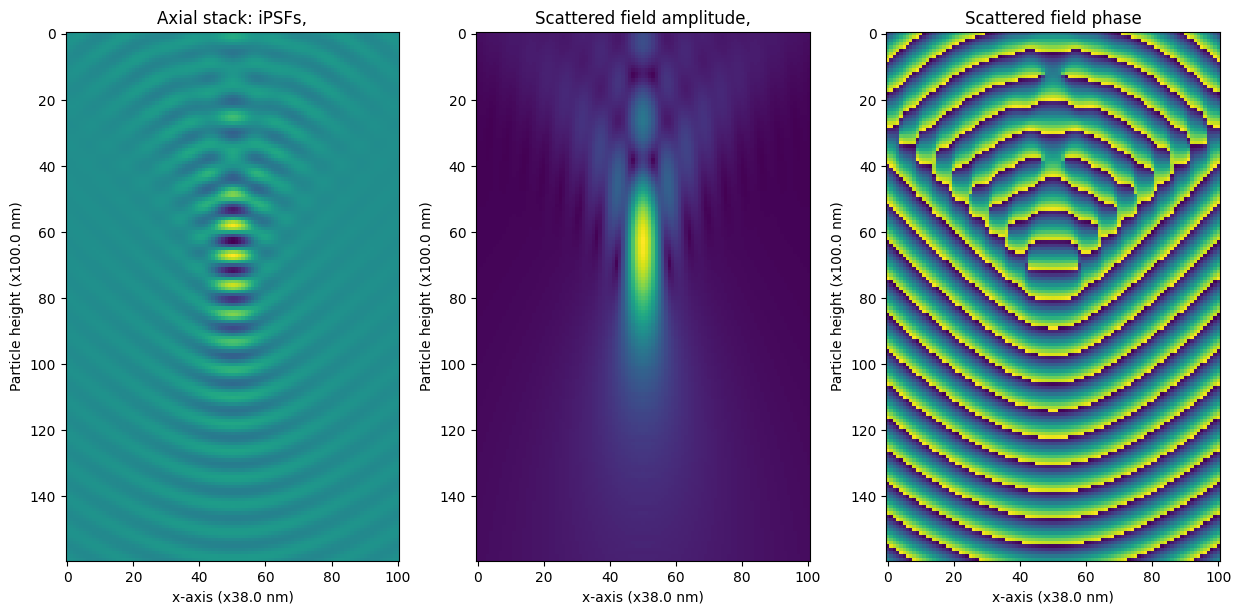

In [16]:
iPSFs_AxialStack_meirdonal = iPSFs_AxialStack[:,1+r_,:]
scatteredFieldAmplitude_AxialStack_meirdonal = scatteredFieldAmplitude_AxialStack[:,1+r_,:]
scatteredFieldPhase_AxialStack_meirdonal = scatteredFieldPhase_AxialStack[:,1+r_,:]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7), dpi= 100, facecolor='w', edgecolor='k')

ax_1 = fig.add_subplot(131)
ax_1.imshow(iPSFs_AxialStack_meirdonal)
ax_1.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_1.set_ylabel('Particle height (x' + str(1e2) + ' nm)')
ax_1.set_title('Axial stack: iPSFs,')

ax_2 = fig.add_subplot(132)
ax_2.imshow(scatteredFieldAmplitude_AxialStack_meirdonal)
ax_2.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_2.set_ylabel('Particle height (x' + str(1e2) + ' nm)')
ax_2.set_title('Scattered field amplitude,')


ax_3 = fig.add_subplot(133)
ax_3.imshow(scatteredFieldPhase_AxialStack_meirdonal)
ax_3.set_xlabel('x-axis (x' + str(pixel_size*1e9) + ' nm)')
ax_3.set_ylabel('Particle height (x' + str(1e2) + ' nm)')
ax_3.set_title('Scattered field phase')

plt.show()


### Save the modelled data

Finally, we can save a modelled iPSF stack onto the storage as a binary file using the video writing functionalities of the [InputOutput module](https://max-planck-institute-for-the-science-of-light-piscat.readthedocs-hosted.com/en/latest/code_reference.html#piscat-inputoutput).  



In [11]:
from piscat.InputOutput import write_video
data_path = current_path 
write_video.write_binary(dir_path=data_path, file_name='iPSFs_AxialStack.bin', data=iPSFs_AxialStack, type='original')

Directory  20210926-211034  Created 


'C:\\Users\\rgholam\\Downloads\\round2\\20210926-211034'

### Bibliography 

1. "Point spread function in interferometric scattering microscopy (iSCAT). Part I: aberrations in defocusing and axial localization.",
Reza Gholami Mahmoodabadi, Richard W. Taylor, Martin Kaller, Susann Spindler, Mahdi Mazaheri, Kiarash Kasaian, and Vahid Sandoghdar,
Optics Express Vol. 28, Issue 18, pp. 25969-25988 (2020) •https://doi.org/10.1364/OE.401374
